In [ ]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install nltk

In [37]:
! pip install requests nlpaug

In [3]:
! mkdir -p /your/home/tmp
! TMPDIR=/your/home/tmp pip install torch

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manyl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

True

In [8]:
! pip install textattack

  Using cached textattack-0.3.10-py3-none-any.whl.metadata (38 kB)
  Using cached bert_score-0.3.13-py3-none-any.whl.metadata (15 kB)
  Using cached editdistance-0.8.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached flair-0.15.1-py3-none-any.whl.metadata (12 kB)
  Using cached language_tool_python-2.9.3-py3-none-any.whl.metadata (54 kB)
  Using cached lemminflect-0.2.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached lru_dict-1.3.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached terminaltables-3.1.10-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached word2number-1.1-py3-none-any.whl
  Using cached num2words-0.5.14-py3-none-any.whl.metadata (13 kB)
  Using cached more_itertools-10.7.0-py3-none-any.whl.metadata (37 kB)
  Using c

In [3]:
from textattack.augmentation import WordNetAugmenter

/run/media/aadimprajapati/New Volume/fnclick/python/sentiment-analysis-social-media/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/aadimprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
dataset = pd.read_csv('data/Train.csv')

In [16]:
dataset = dataset[dataset['Body'].notna() & (dataset['Body'].str.strip() != '')]

In [17]:
print(dataset)

        Id                                               Body Sentiment Type
0        1  rule 2 no metes about polarizing political top...        neutral
2        3  no politics danger now i can make a propaganda...       negative
3        4                       i am the senate gets stabbed        neutral
4        5                                  is this a suicide        neutral
5        6                                            removed        neutral
...    ...                                                ...            ...
1995  1996                       god gen alpha needs to chill        neutral
1996  1997           people when new generation does anything       positive
1997  1998                        me when minor inconvenience       negative
1998  1999  as a gen z who didn experience brain rot in we...       negative
1999  2000  ah the vine era had a boatload of cringe quote...       negative

[1772 rows x 3 columns]


In [18]:
negative_rows = dataset[dataset['Sentiment Type'] == 'negative'].reset_index(drop=True)

negative_rows

,Id,Body,Sentiment Type
0,3,no politics danger now i can make a propaganda...,negative
1,16,the senate was evil,negative
2,26,weird how you spell wine the pooh,negative
3,43,lost meme subreddits have similar rules that a...,negative
4,44,yep left this sub for its toxicity and now i c...,negative
...,...,...,...
353,1991,dont compare our majestic big changes to a hea...,negative
354,1992,are we actually being nostalgic about our own ...,negative
355,1998,me when minor inconvenience,negative
356,1999,as a gen z who didn experience brain rot in we...,negative


In [19]:
negative_rows['Body'] = [" ".join(augmentor.augment(negative_rows['Body'][x])) for x in range(len(negative_rows))]

negative_rows

,Id,Body,Sentiment Type
0,3,no government peril now i can get a propaganda...,negative
1,16,the Senate was vicious,negative
2,26,unearthly how you while vino the pooh,negative
3,43,confounded meme subreddits have interchangeabl...,negative
4,44,yep bequeath this hoagie for its perniciousnes...,negative
...,...,...,...
353,1991,dont liken our majestic braggy changes to a mi...,negative
354,1992,are we really being nostalgic about our own ba...,negative
355,1998,me when underage worriment,negative
356,1999,as a gen Z who didn receive psyche buncombe in...,negative


In [23]:
dataset = pd.concat([dataset, negative_rows], ignore_index=True)

In [24]:
dataset

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,3,no politics danger now i can make a propaganda...,negative
2,4,i am the senate gets stabbed,neutral
3,5,is this a suicide,neutral
4,6,removed,neutral
...,...,...,...
2125,1991,dont liken our majestic braggy changes to a mi...,negative
2126,1992,are we really being nostalgic about our own ba...,negative
2127,1998,me when underage worriment,negative
2128,1999,as a gen Z who didn receive psyche buncombe in...,negative


In [25]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [26]:
wnl = WordNetLemmatizer()

In [27]:
def preprocessText(text):
    text = text.lower()

    tokens = word_tokenize(text)

    filtered = [token for token in tokens if token.isalpha()]

    lemmas = [wnl.lemmatize(x) for x in filtered]

    return ' '.join(lemmas)


In [28]:
dataset['processedText'] = dataset['Body'].apply(preprocessText)
dataset['processedText']

0       rule no mete about polarizing political topic ...
1       no politics danger now i can make a propaganda...
2                             i am the senate get stabbed
3                                       is this a suicide
4                                                 removed
                              ...                        
2125    dont liken our majestic braggy change to a min...
2126    are we really being nostalgic about our own ba...
2127                           me when underage worriment
2128    a a gen z who didn receive psyche buncombe in ...
2129    ah the vine epoch had a shipload of funk quote...
Name: processedText, Length: 2130, dtype: object

In [29]:
dataset['processedSentiment'] = dataset['Sentiment Type'].apply(preprocessText)

dataset['processedSentiment']

0        neutral
1       negative
2        neutral
3        neutral
4        neutral
          ...   
2125    negative
2126    negative
2127    negative
2128    negative
2129    negative
Name: processedSentiment, Length: 2130, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
X = dataset['processedText']
y = dataset['processedSentiment']

In [32]:
X

0       rule no mete about polarizing political topic ...
1       no politics danger now i can make a propaganda...
2                             i am the senate get stabbed
3                                       is this a suicide
4                                                 removed
                              ...                        
2125    dont liken our majestic braggy change to a min...
2126    are we really being nostalgic about our own ba...
2127                           me when underage worriment
2128    a a gen z who didn receive psyche buncombe in ...
2129    ah the vine epoch had a shipload of funk quote...
Name: processedText, Length: 2130, dtype: object

In [33]:
y = y.str.strip().str.lower() 

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [35]:
print(np.unique(y_encoded))  

[0 1 2]


   Value  Count
0      0    716
1      1    782
2      2    632


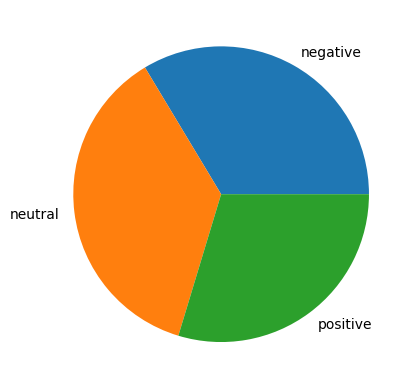

In [36]:
unique_vals, counts = np.unique(y_encoded, return_counts=True)
dt = pd.DataFrame(zip(unique_vals, counts), columns=['Value', 'Count'])
print(dt)

items = dt['Count']

plt.pie(items, labels = encoder.inverse_transform(dt['Value']))
plt.show() 

In [37]:
y_encoded

array([1, 0, 1, ..., 0, 0, 0], shape=(2130,))

In [38]:
list(encoder.inverse_transform(np.unique(y_encoded)))

['negative', 'neutral', 'positive']

In [39]:
X

0       rule no mete about polarizing political topic ...
1       no politics danger now i can make a propaganda...
2                             i am the senate get stabbed
3                                       is this a suicide
4                                                 removed
                              ...                        
2125    dont liken our majestic braggy change to a min...
2126    are we really being nostalgic about our own ba...
2127                           me when underage worriment
2128    a a gen z who didn receive psyche buncombe in ...
2129    ah the vine epoch had a shipload of funk quote...
Name: processedText, Length: 2130, dtype: object

In [40]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_df=0.9, min_df=5)

x_vect = vectorizer.fit_transform(dataset['processedText'])

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x_vect, y_encoded, test_size=0.2, random_state=42)

In [42]:
print(y.value_counts())

processedSentiment
neutral     782
negative    716
positive    632
Name: count, dtype: int64


In [43]:
xtrain

<1704x695 sparse matrix of type '<class 'numpy.float64'>'
	with 7250 stored elements in Compressed Sparse Row format>

In [44]:
ytrain

array([1, 1, 1, ..., 2, 2, 0], shape=(1704,))

In [45]:
model = MultinomialNB()

In [46]:
model.fit(xtrain, ytrain)

MultinomialNB()

In [47]:
ypred = model.predict(xtest)

In [48]:
accuracy_score(ytest, ypred)

0.6666666666666666

In [49]:
confusion_matrix(ytest, ypred)

array([[ 93,  37,  17],
       [ 28, 118,   9],
       [ 16,  35,  73]])

In [71]:
caption = "Every day is a fresh start—stay hopeful, stay kind, stay you."
caption_processed = preprocessText(caption)

caption_processed

'every day is a fresh hopeful stay kind stay you'

In [72]:
caption_processed_vect = vectorizer.transform([caption_processed])

caption_processed_vect

<1x695 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [73]:
ypred = model.predict(caption_processed_vect)

ypred

array([2])

In [74]:
list(encoder.inverse_transform(ypred))

['positive']

In [ ]:
! pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import joblib

In [76]:
joblib.dump(model, 'sentimentanalyze.pkl')

['sentimentanalyze.pkl']

In [77]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [78]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']